# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


Here, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [66]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


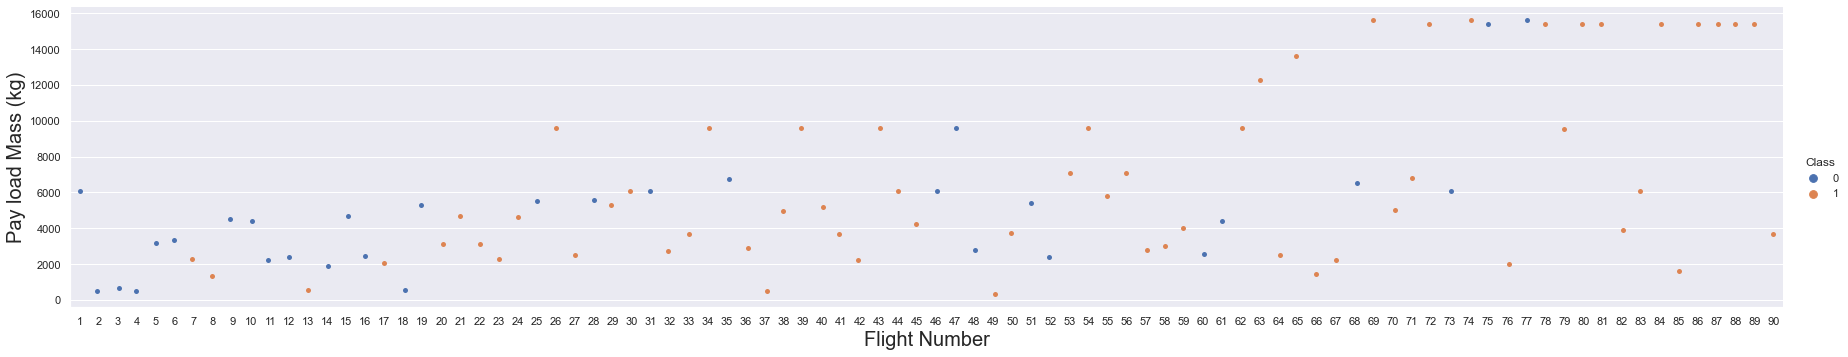

In [67]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### Visualize the relationship between Flight Number and Launch Site


Using the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


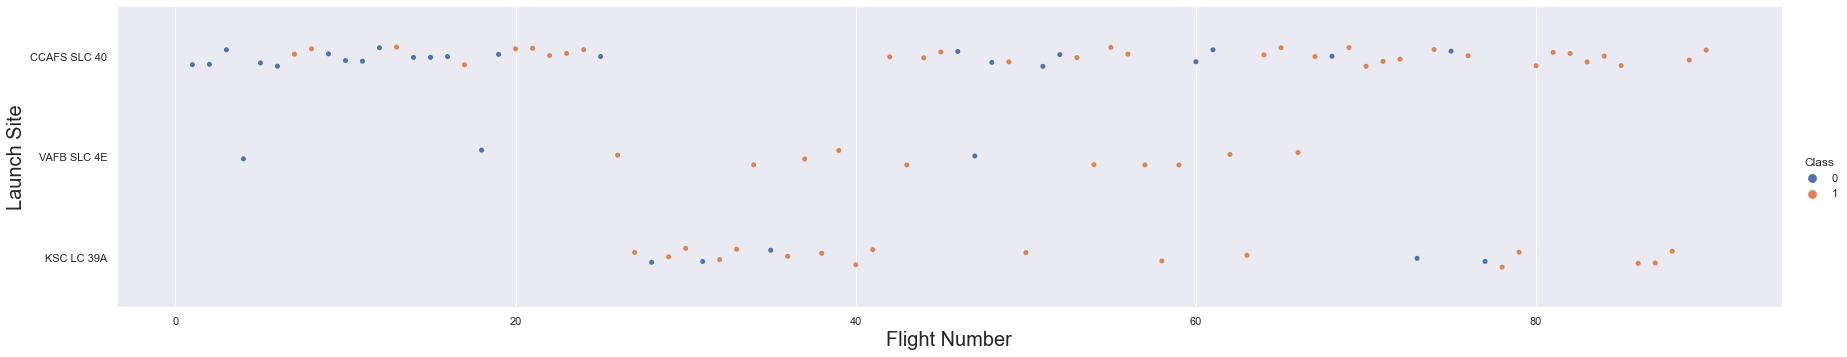

In [68]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


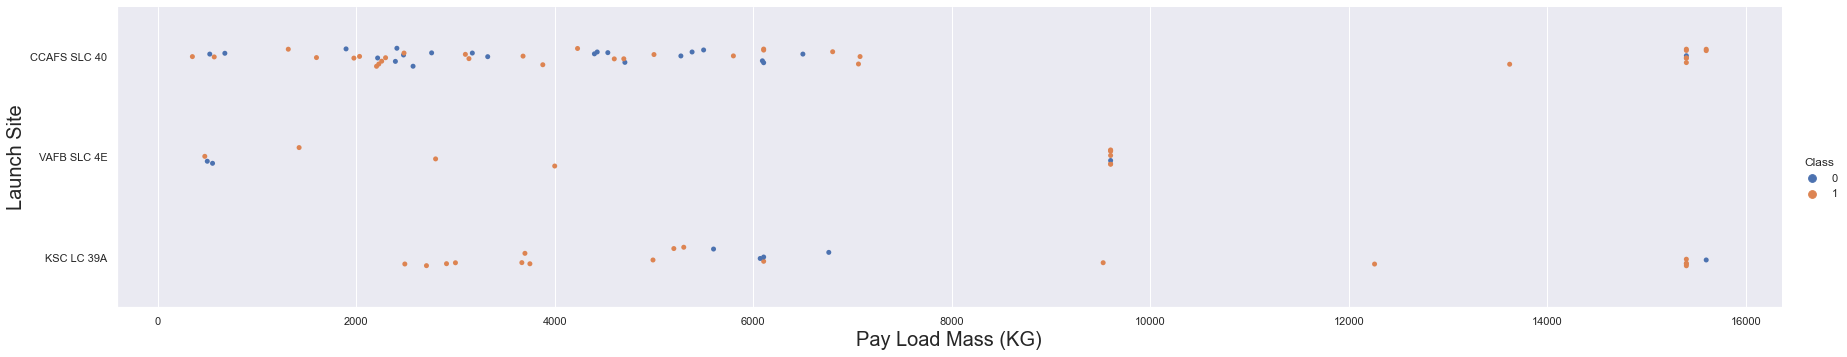

In [69]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay Load Mass (KG)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if we observe Payload Vs. Launch Site scatter point chart we will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Text(0, 0.5, 'Success Rate')

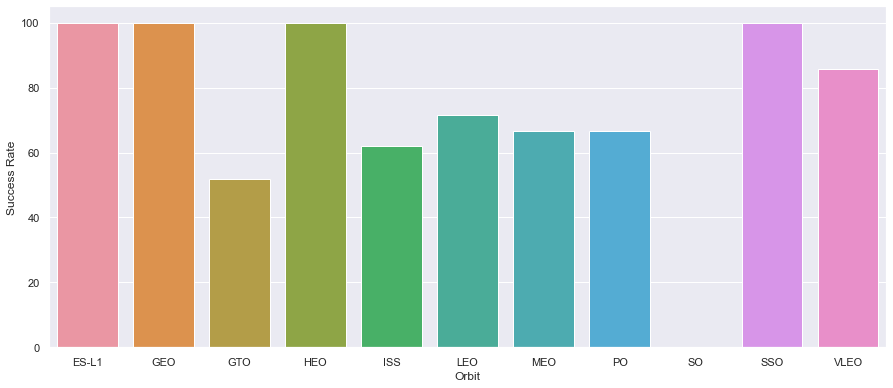

In [70]:
df_grouped = df.groupby('Orbit').mean().reset_index()
df_grouped['Class'] = df_grouped['Class']*100
ax=sns.barplot(x = df_grouped['Orbit'], y = df_grouped['Class'])
ax.set_xlabel('Orbit')
ax.set_ylabel('Success Rate')



### Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


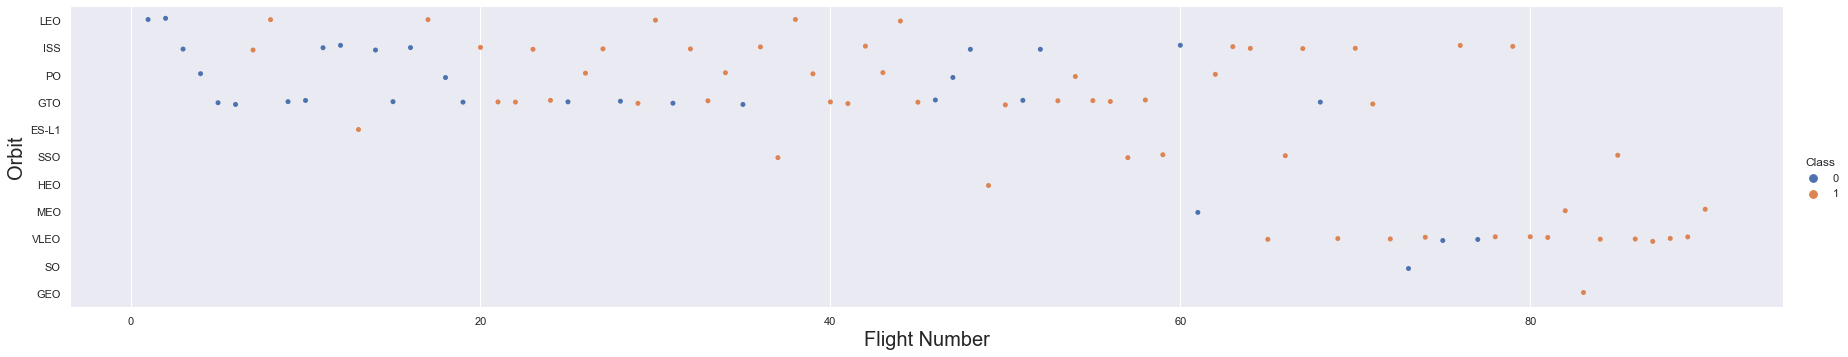

In [71]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


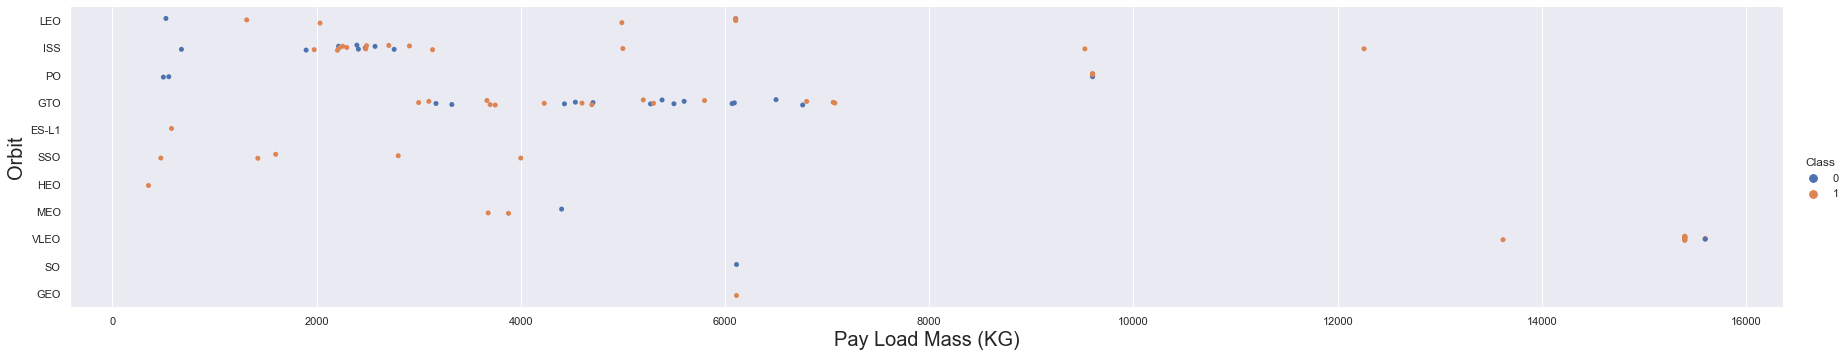

In [72]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay Load Mass (KG)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [73]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [74]:
#Converting date to datetime value and 
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')


Text(0, 0.5, 'Success Rate')

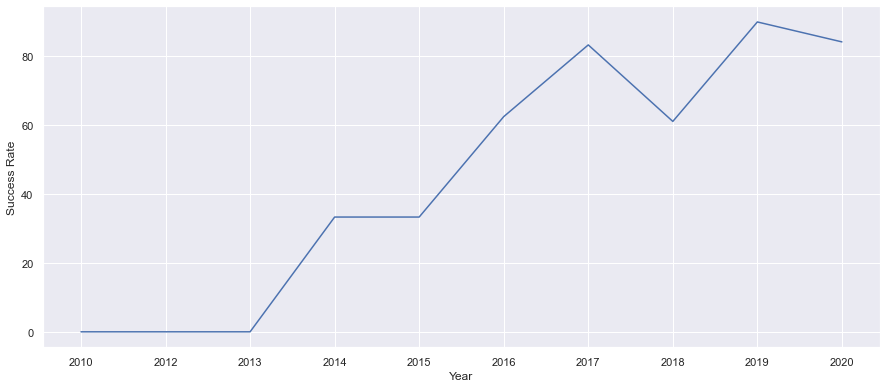

In [75]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_grouped = df.groupby('Year').mean().reset_index()
df_grouped['Class'] = df_grouped['Class']*100
sns.set(rc={'figure.figsize':(15,6.27)})
ax = sns.lineplot(x = df_grouped['Year'], y = df_grouped['Class'])
ax.set_xlabel('Year')
ax.set_ylabel('Success Rate')

The success rate since 2013 kept increasing till 2020


## Features Engineering


In [76]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004

### Create dummy variables to categorical columns


We use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. We assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
features = pd.get_dummies(data=features, columns = ['Orbit','LaunchSite','LandingPad','Serial'])

In [88]:
features_one_hot = features

### Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, we can cast the entire dataframe to variable type <code>float64</code>


In [92]:
features_one_hot = features_one_hot.astype('float64')

In [93]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object